## Introduction


In this notebook, we have analyzed and processed the data collected by sensors connected to Wio Terminal. After organizing the data into a CSV file, we performed data processing and analysis, including normalization.

Normalization is a data preprocessing technique used to scale numerical features in a dataset to a standard range, typically between 0 and 1. It doesn't involve setting values to their maximum ranges but rather scaling them so that they fall within a specified range. The purpose of normalization is to bring different features with different scales onto a common scale.

The normalization formula for a feature x is typically:

\begin{align*}
\text{X}_{\text{normalized}} &= \frac{\text{X} - \text{X}_{\text{min}}}{\text{X}_{\text{max}} - \text{X}_{\text{min}}}
\end{align*}


- X<sub>normalized</sub> is the normalized value of feature X.
- X is the original value of feature X.
- X<sub>min</sub> is the minimum value of feature X in the dataset.
- X<sub>max</sub> is the maximum value of feature X in the dataset.

After normalization, all values of feature X will be scaled to a range between 0 and 1, with the minimum value becoming 0 and the maximum value becoming 1. This process can help in making different features more comparable and can be particularly useful in machine learning algorithms that rely on feature scaling, such as neural networks and k-means clustering.

## Analyze the data

This section plays a crucial role in analyzing the data contained in CSV files. We begin by reading data from a specific directory and organizing this data into a suitable structure. We ensure that the data is valid and that the header is consistent across all files.

After this initial phase, we delve into the analysis of the data itself. We calculate fundamental statistics such as means, standard deviations, and maximum and minimum values for each data column. These statistics provide an overview of the main data characteristics.

But the analysis doesn't stop there. We proceed to visualize the data to better understand its distribution and correlations. We use scatter plots and a correlation matrix to identify any relationships between variables.

Furthermore, we take into account the count of file names in the directory, which can be useful for understanding how many instances of each class are present in the data.

We don't just stop at statistics and visualizations. We also examine the distribution of variables through violin plots that show how data is distributed within each column.

Finally, we provide a comprehensive summary of data statistics, including means, standard deviations, maximum and minimum values, as well as the data range.

In [1]:
# Import the 'csv' module for CSV file handling
import csv

# Import the 'os' module for working with the operating system
import os

# Import the 'shutil' module for file operations like moving and deleting
import shutil

# Import the 'numpy' library for numerical and mathematical operations
import numpy as np

# Import the 'matplotlib.pyplot' module for creating plots and charts
import matplotlib.pyplot as plt

# Import the 'pandas' library for data manipulation and analysis
import pandas as pd

# Import the 'seaborn' library for data visualization based on Matplotlib
import seaborn as sns


In [3]:
# Load the dataset
!pip install --upgrade --no-cache-dir gdown
!gdown 166-XWPL9b9vztD086wlOd__r5itsdoS7
!mkdir -p /content/dataset
!unzip -u /content/Dataset_electronic_nose_6.zip -d /content/dataset

Downloading...
From: https://drive.google.com/uc?id=166-XWPL9b9vztD086wlOd__r5itsdoS7
To: /content/Dataset_electronic_nose_6.zip
100% 3.72M/3.72M [00:00<00:00, 173MB/s]
Archive:  /content/Dataset_electronic_nose_6.zip


In [4]:
### Settings
HOME_PATH = "/content"              # Location of the working directory
DATASET_PATH = "/content/dataset/Dataset_electronic_nose_6"   # Upload your .csv samples to this directory
OUT_PATH = "/content/out"           # Where output files go (will be deleted and recreated)
OUT_ZIP = "/content/out.zip"        # Where to store the zipped output files

PREP_DROP = -1                      # Drop a column
PREP_NONE = 0                       # Perform no preprocessing on column of data
PREP_NORM = 2                       # Perform normalization on column of data

In [5]:
# Initialize variables to store header, raw data, and the number of lines found in each .csv file
header = None  # The header of the CSV data
raw_data = []  # List to store the raw data
num_lines = []  # List to store the number of lines in each CSV file
filenames = []  # List to store the filenames of the CSV files

# Loop through each file in the specified directory (DATASET_PATH)
for filename in os.listdir(DATASET_PATH):

    # Check if the current item in the directory is a file
    filepath = os.path.join(DATASET_PATH, filename)
    if not os.path.isfile(filepath):
        continue  # Skip to the next item if it's not a file

    # Try to read the CSV file using Pandas
    try:
        df = pd.read_csv(filepath)
    except pd.errors.EmptyDataError:
        print("Warning: Empty CSV file detected. Skipping", filename)
        continue  # Skip empty CSV files
    except pd.errors.ParserError:
        print("Error: Parsing CSV file failed. Skipping", filename)
        continue  # Skip CSV files with parsing errors

    # Extract the header and data from the CSV file
    file_header = df.columns.tolist()  # Extract the header as a list
    file_data = df.values.tolist()      # Extract the data as a list of lists

    # Check if the header is already set; if not, set it
    if header is None:
        header = file_header
    # If the current file's header doesn't match the existing header, skip this file
    elif header != file_header:
        print("Error: Headers do not match. Skipping", filename)
        continue

    # Append the data and update the counters
    raw_data.extend(file_data)  # Append the data from this file to the raw_data list
    num_lines.append(len(file_data))  # Store the number of lines in this file
    filenames.append(filename)  # Store the filename of this file

# Convert the collected raw data into a NumPy array for further processing
raw_data = pd.DataFrame(raw_data, columns=header).values

# Print out the results
print("Dataset array shape:", raw_data.shape)  # Display the shape (dimensions) of the NumPy array
print("Number of elements in num_lines:", len(num_lines))  # Display the number of elements in the num_lines list
print("Number of filenames:", len(filenames))  # Display the number of elements in the filenames list
assert len(num_lines) == len(filenames)  # Ensure that the number of lines and filenames match


Dataset array shape: (86912, 10)
Number of elements in num_lines: 10864
Number of filenames: 10864


In [6]:
# Import the Counter class from the collections module
from collections import Counter

# Get the list of files in the directory
files = os.listdir(DATASET_PATH)

# Initialize an empty dictionary to count occurrences of file names
name_counts = Counter()

# Iterate through the files in the directory
for file in files:
    # Split the file name based on the dot and take only the part before the dot
    name = os.path.splitext(file)[0].split('.')[0]

    # Add the file name to the counts dictionary
    name_counts[name] += 1

# Multiply the counts by 8 and store them back in the dictionary
name_counts = {name: count * 8 for name, count in name_counts.items()}

# Extract the unique class names from the dictionary keys
class_names = name_counts.keys()

# Extract the corresponding counts from the dictionary values
class_counts = name_counts.values()

# Now you can access the `name_counts` dictionary to get occurrences of file names
print(name_counts)


{'coffee': 10872, 'chamomile': 10872, 'lighter_gas': 10872, 'martini': 10872, 'vinegar': 10864, 'tea': 10872, 'background': 10816, 'cocoa': 10872}


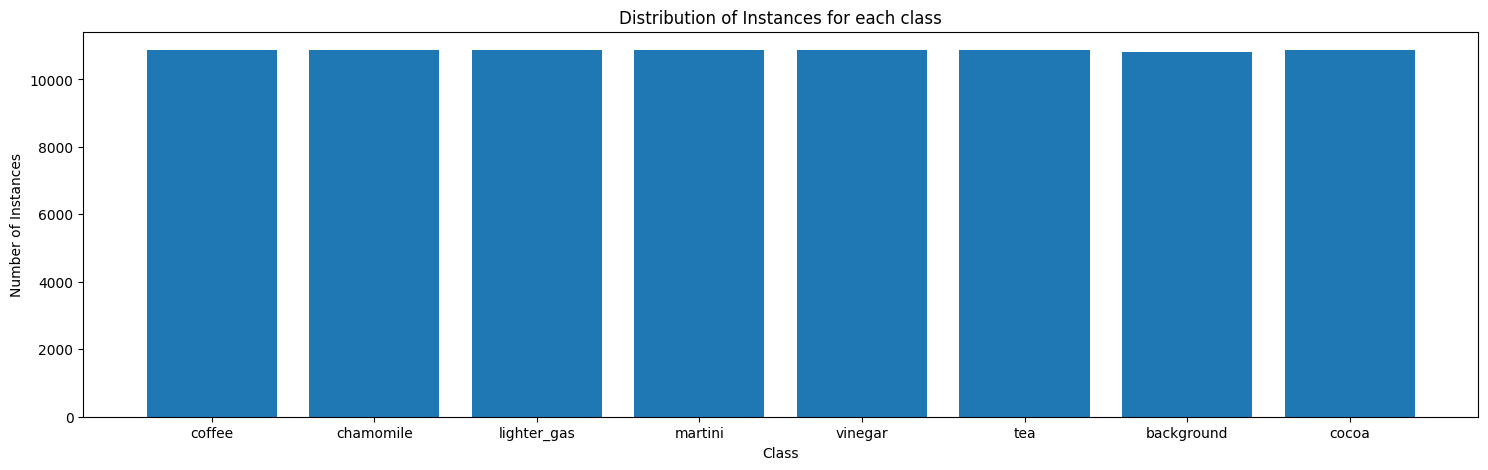

In [7]:
# Create a new figure for the bar chart with a specified size
plt.figure(figsize=(18, 5))

# Create a bar chart using class_names as the x-axis labels and class_counts as the corresponding bar heights
plt.bar(class_names, class_counts)

# Set the label for the x-axis
plt.xlabel("Class")

# Set the label for the y-axis
plt.ylabel("Number of Instances")

# Set the title for the bar chart
plt.title("Distribution of Instances for each class")

# Display the bar chart
plt.show()


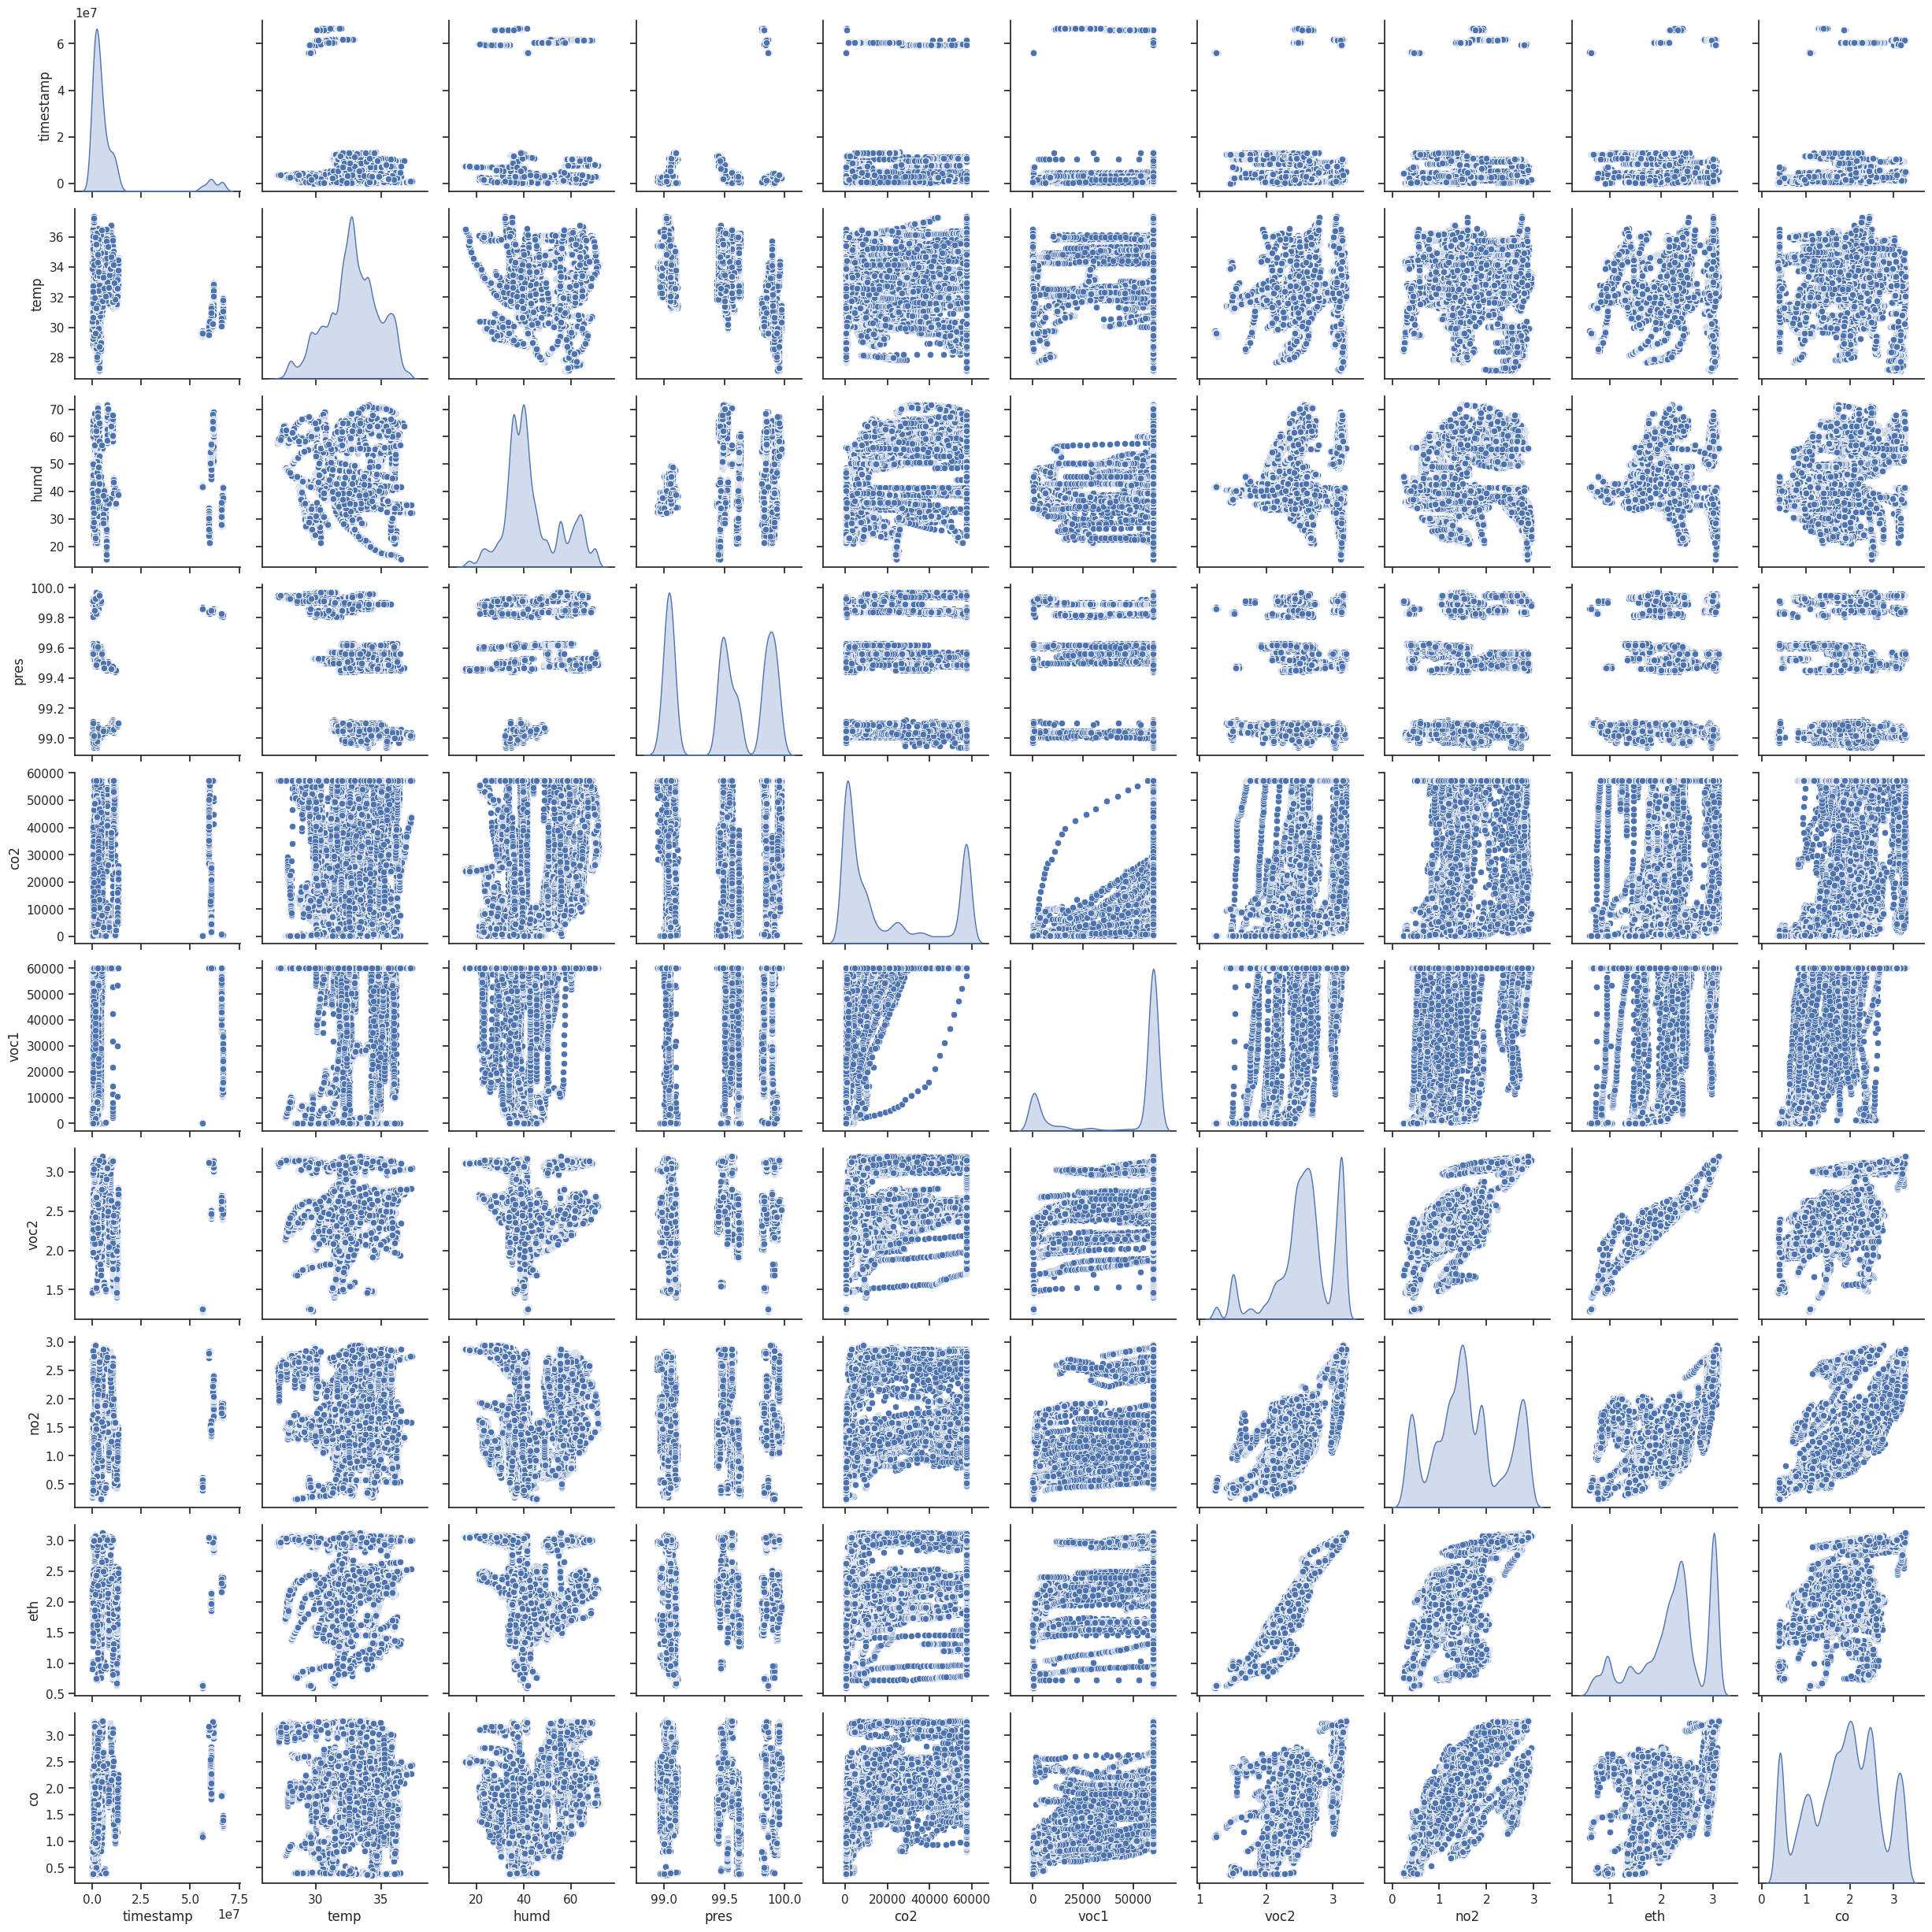

In [8]:
### Plot scatter matrix to look for correlation

# Convert NumPy array to Pandas DataFrame
df = pd.DataFrame(raw_data, columns=header)

# Create a pairplot using Seaborn
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, diag_kind="kde", height=2.5)
plt.show()

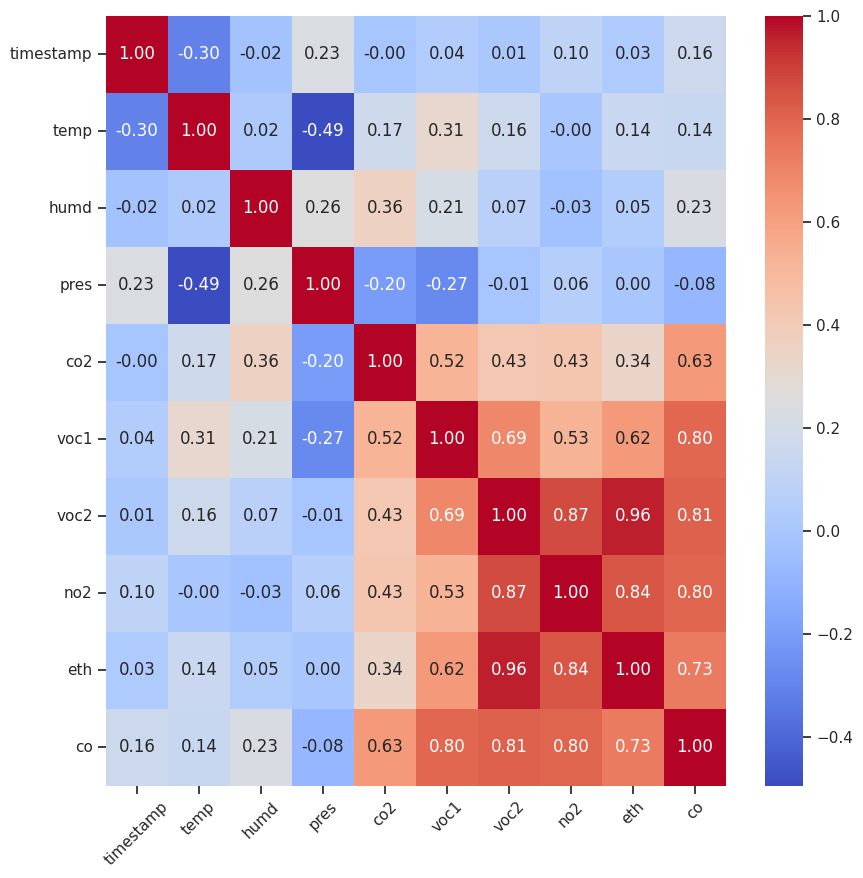

In [9]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

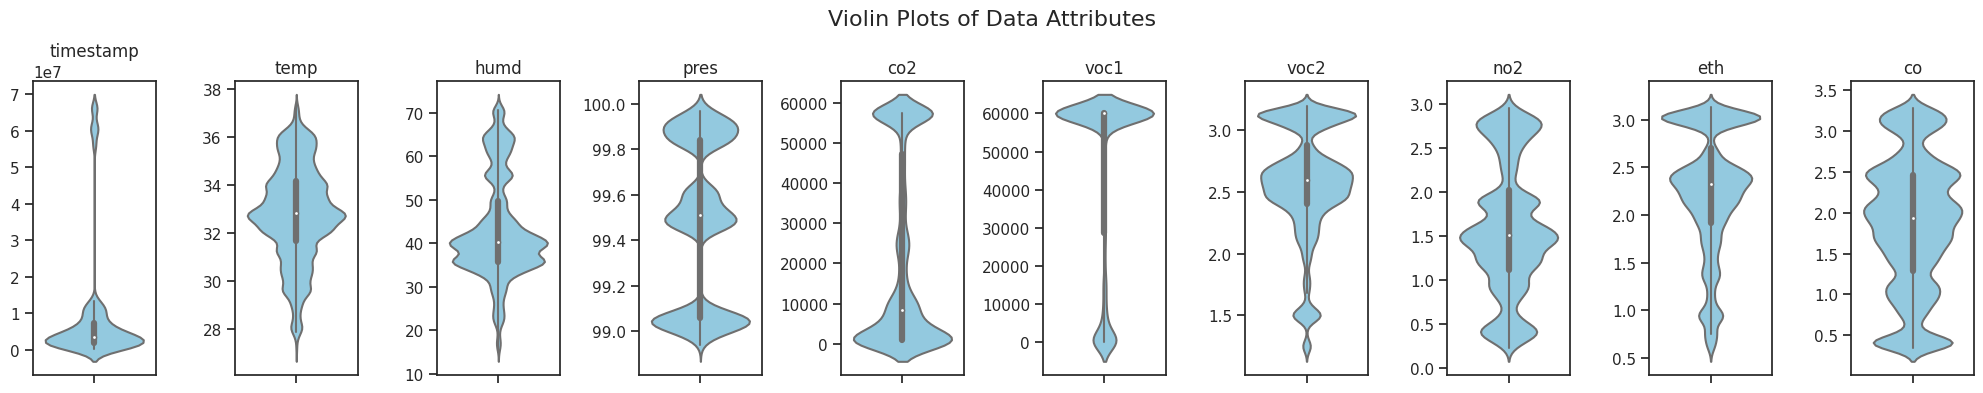

In [10]:
# Create subplots with a shared y-axis
num_hists = len(header)
fig, axes = plt.subplots(1, num_hists, figsize=(20, 4))
fig.suptitle("Violin Plots of Data Attributes", fontsize=16)

# Create violin plots for each category of data
for i in range(num_hists):
    sns.violinplot(y=raw_data[:, i], ax=axes[i], color="skyblue")
    axes[i].set_title(header[i])

# Adjust spacing between subplots
plt.tight_layout()
plt.subplots_adjust(top=0.8)

# Show the violin plots
plt.show()


In [11]:
# Calculate means, standard deviations, and ranges
means = np.mean(raw_data, axis=0)
std_devs = np.std(raw_data, axis=0)
maxes = np.max(raw_data, axis=0)
mins = np.min(raw_data, axis=0)
ranges = np.ptp(raw_data, axis=0)

# Print results
for i, name in enumerate(header):
  print(name)
  print("  mean:", means[i])
  print("  std dev:", std_devs[i])
  print("  max:", maxes[i])
  print("  min:", mins[i])
  print("  range:", ranges[i])

timestamp
  mean: 8980458.72146539
  std dev: 16228210.473949816
  max: 66688037.0
  min: 102236.0
  range: 66585801.0
temp
  mean: 32.84041800902062
  std dev: 1.978160225275211
  max: 37.38
  min: 27.08
  range: 10.300000000000004
humd
  mean: 43.34647091310751
  std dev: 11.598372658647712
  max: 71.82
  min: 15.23
  range: 56.58999999999999
pres
  mean: 99.48302236745214
  std dev: 0.3486669709395264
  max: 99.97
  min: 98.94
  range: 1.0300000000000011
co2
  mean: 20655.427743004417
  std dev: 23021.69046160516
  max: 57330.0
  min: 400.0
  range: 56930.0
voc1
  mean: 45402.29880798969
  std dev: 24201.069770843784
  max: 60000.0
  min: 0.0
  range: 60000.0
voc2
  mean: 2.5706880522827684
  std dev: 0.44739133075630455
  max: 3.2
  min: 1.22
  range: 1.9800000000000002
no2
  mean: 1.591075455633284
  std dev: 0.7447182916165703
  max: 2.96
  min: 0.23
  range: 2.73
eth
  mean: 2.2309030973858617
  std dev: 0.652045786966944
  max: 3.13
  min: 0.6
  range: 2.53
co
  mean: 1.8649024

## Select the data preprocessing approach

In this code, the preprocessing operations to be applied to each data column are defined.

-"PREP_DROP" indicates that the column will be dropped.

-"PREP_NONE" indicates that no preprocessing is required for that column.

-"PREP_NORM" indicates that the column will be normalized.

These operations will be applied to the data columns to ensure they are ready for further analysis.

In [12]:
# For each column we use an appropriate preprocessing:
#     PREP_DROP: It mean that the column will be dropped
#     PREP_NONE: It mean that for that column there is no preprocessing
#     PREP_NORM: It mean that the column will be normalized
preproc = [PREP_NONE,   # Timestamp
           PREP_NORM,   # Temperature
           PREP_NORM,   # Humidity
           PREP_DROP,   # Pressure
           PREP_NORM,   # CO2
           PREP_NORM,   # VOC1
           PREP_NORM,   # VOC2
           PREP_NORM,   # NO2
           PREP_NORM,   # Ethanol
           PREP_NORM]   # CO

## Perform data preprocessing

This code aims to prepare the data for analysis by applying various preprocessing operations. We start by creating masks to identify columns to drop (PREP_DROP) and columns to normalize (PREP_NORM). We then calculate the number of columns to keep after preprocessing.

Next, we create new data structures (prep_data) and a new header (prep_header) for the preprocessed data. We iterate through the columns of the original data, taking into account the masks created earlier. If a column needs to be dropped, we skip it. If it needs to be normalized, we apply data normalization. Otherwise, we copy the data without making changes.

Finally, we collect statistical information about the preprocessed data, such as means, standard deviations, minimum and maximum values, and display them along with the header of the preprocessed data.

In [13]:
# Create a mask to identify columns to drop
drop_mask = np.array(preproc) == PREP_DROP

# Create a mask to identify columns for normalization
norm_mask = np.array(preproc) == PREP_NORM

# Calculate the number of columns to keep
num_cols = len(preproc) - np.sum(drop_mask)

# Create an empty numpy array and header for preprocessed data
prep_data = np.zeros((raw_data.shape[0], num_cols))
prep_header = []
prep_means = []
prep_std_devs = []
prep_mins = []
prep_ranges = []

prep_c = 0  # Index for the preprocessed data columns

for raw_c, col_name in enumerate(header):

    if drop_mask[raw_c]:
        print("Dropping", col_name)
        continue

    if norm_mask[raw_c]:
        # Perform data normalization
        prep_data[:, prep_c] = (raw_data[:, raw_c] - mins[raw_c]) / ranges[raw_c]

    else:
        # Copy data over if no preprocessing is requested
        prep_data[:, prep_c] = raw_data[:, raw_c]

    # Copy header (and preprocessing constants)
    prep_header.append(col_name)
    prep_means.append(means[raw_c])
    prep_std_devs.append(std_devs[raw_c])
    prep_mins.append(mins[raw_c])
    prep_ranges.append(ranges[raw_c])

    prep_c += 1

# Show new data header and shape
print(prep_header)
print("New data shape:", prep_data.shape)
print("Means:", [float("{:.4f}".format(x)) for x in prep_means])
print("Std devs:", [float("{:.4f}".format(x)) for x in prep_std_devs])
print("Mins:", [float("{:.4f}".format(x)) for x in prep_mins])
print("Ranges:", [float("{:.4f}".format(x)) for x in prep_ranges])


Dropping pres
['timestamp', 'temp', 'humd', 'co2', 'voc1', 'voc2', 'no2', 'eth', 'co']
New data shape: (86912, 9)
Means: [8980458.7215, 32.8404, 43.3465, 20655.4277, 45402.2988, 2.5707, 1.5911, 2.2309, 1.8649]
Std devs: [16228210.4739, 1.9782, 11.5984, 23021.6905, 24201.0698, 0.4474, 0.7447, 0.652, 0.8113]
Mins: [102236.0, 27.08, 15.23, 400.0, 0.0, 1.22, 0.23, 0.6, 0.35]
Ranges: [66585801.0, 10.3, 56.59, 56930.0, 60000.0, 1.98, 2.73, 2.53, 2.93]


## Analyze newly preprocessed data

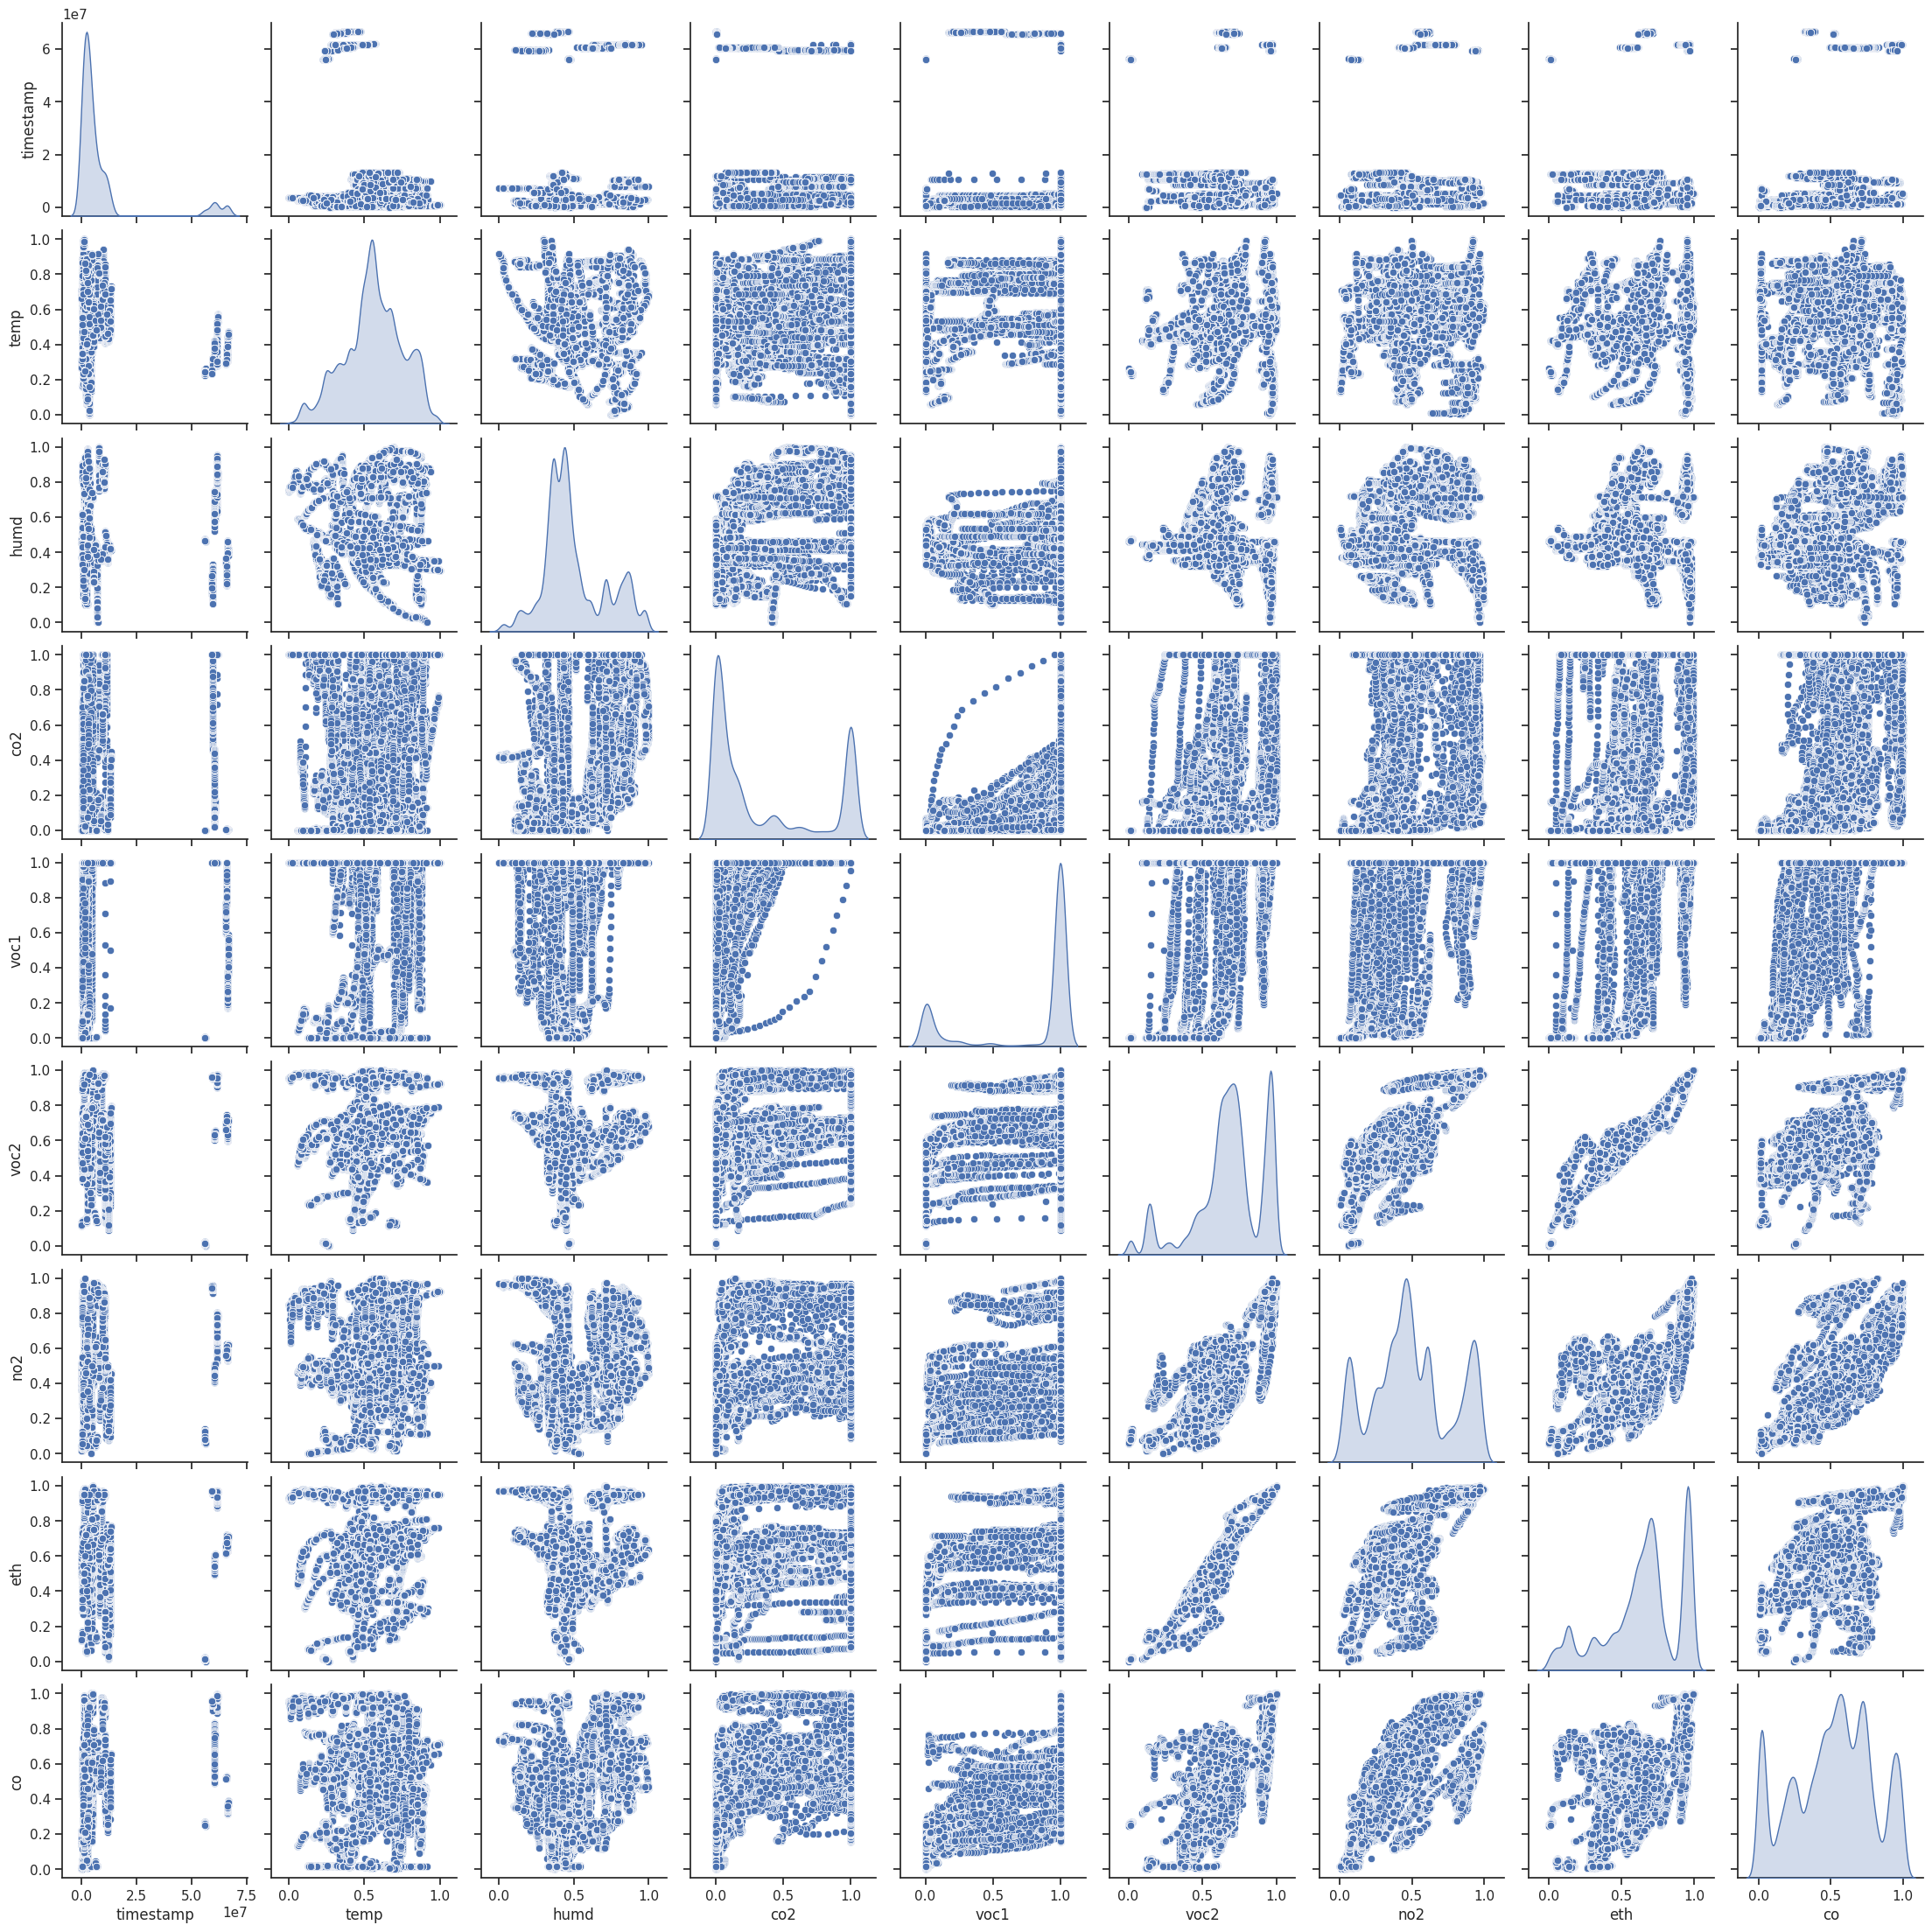

In [14]:
### Plot scatter matrix to look for correlation

# Convert NumPy array to Pandas DataFrame
df = pd.DataFrame(prep_data, columns=prep_header)

# Create a pairplot using Seaborn
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, diag_kind="kde", height=2.5)
plt.show()

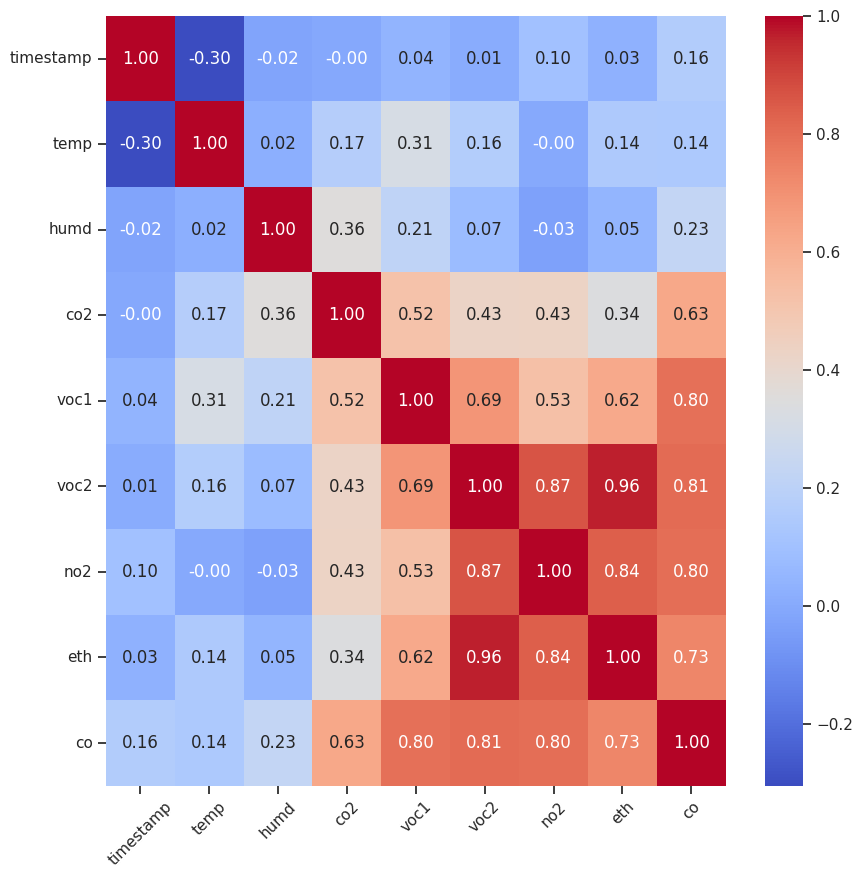

In [15]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

## Store preprocessed data in CSV files

This code manages the creation of a ZIP archive containing processed CSV files. It uses the pathlib library to handle file and directory paths. It begins by removing the output directory if it exists and then recreates it.

Next, it iterates through all the original file names and creates the corresponding CSV files in the output directory. To do this, it creates a new Path object for each output file and uses csv.writer to write the header and contents of the file.

Finally, it creates a ZIP file that includes all the files in the output directory. To achieve this, it uses zipfile.ZipFile and recursively traverses the output directory, adding each file to the ZIP archive.

In [16]:
from pathlib import Path
import zipfile

# Use pathlib to handle paths
output_path = Path(OUT_PATH)
zip_output_path = Path(OUT_ZIP)

# Delete output directory (if it exists) and recreate it
if output_path.exists() and output_path.is_dir():
    shutil.rmtree(output_path)

# Recreate the output directory
output_path.mkdir(parents=True, exist_ok=True)

# Go through all the original filenames
row_index = 0

for file_num, filename in enumerate(filenames):
    # Open .csv file using Path
    file_path = output_path / filename

    with file_path.open(mode='w', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',')

        # Write header
        csv_writer.writerow(prep_header)

        # Write contents
        for _ in range(num_lines[file_num]):
            csv_writer.writerow(prep_data[row_index])
            row_index += 1

# Zip output directory
with zipfile.ZipFile(zip_output_path, 'w', zipfile.ZIP_DEFLATED) as zf:
    # Walk through the output directory and add files to the zip archive
    for root, _, files in os.walk(output_path):
        for file in files:
            file_path = Path(root) / file
            zf.write(file_path, file_path.relative_to(output_path))

# Change back to the home directory
os.chdir(HOME_PATH)
